# **Problem set 2** - Machine Learning for Physics and Astronomy 2023/2024, UvA
---




- The total sheet gives 26 points
- Deadline for submitting your results is **Wed 17/04/2024, 23:59**
- **IMPORTANT**: Specify if/how AI was used to solve the exercises by filling the corresponding "Usage of AI" comments. Anything between "No" (if applicable) and a short paragraph reflecting how AI was used is fine. Failing to do so faithfully will result in the substraction of points.

## Chapter 3: Inference and Bayes nets (16 points)

### 3.1 Inverse Sampling (2 points)

*Topics: Inverse transform sampling*

**Reading material: Murphy 23.2.1**

(2 points) Consider the target exponential pdf $p(x)=\lambda e^{-\lambda x}$, where $\lambda$ is the rate parameter. Define a function that, using the inverse transform method, generates samples from the exponential distribution.

Choosing $\lambda =0.5$ and a sample size of $1000$, plot the histogram of the sampled data and overlay the theoretical exponential distribution curve on top.

Hint: You will need to use the function `np.random.uniform`

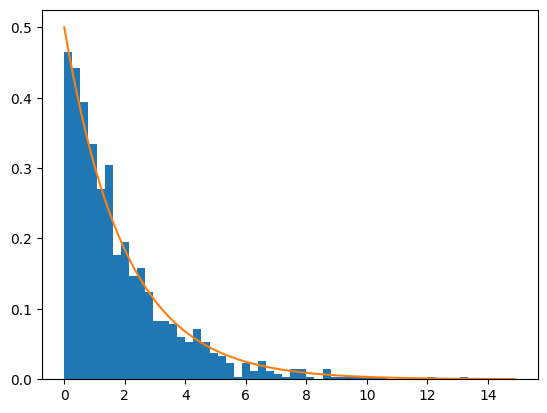

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def inverse_transform(rate, sample_size):
  # YOUR CODE HERE
  u = np.random.uniform(size=sample_size)
  x = -np.log(1-u)/rate
  return x

'''sanity check'''
l = 0.5
sample_size = 1000
sample_1 = inverse_transform(l, sample_size)
Range = np.arange(0,15,0.1)
y = l*np.exp(-l*Range)
plt.hist(sample_1,bins =50,density=True)
plt.plot(Range,y)
plt.show()


Usage of AI: *COMMENT HERE*

No.

### 3.2 Metropolis Hastings & credible intervals (10 points)



*Topics: Multivariate normal, Metropolis Hastings and marginal distributionsm Credible intervals, Highest posterior density region*

**Reading material: Murphy 5.2.2, 5.2.2.1, 24.3**

We will explore a 2-dim and bimodal probability density function.

In [2]:
# provided

# The likelihood function is given

def pdf_bimodal(x):
    """Bimodal pdf"""
    sigma1 = 1.0
    sigma2 = 0.5
    #pdf = 0.5/(np.sqrt(2*np.pi*sigma1**2))*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/(np.sqrt(2*np.pi*sigma2**2))*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    '''The original form is somhow wrong: the normalization is not 1'''
    pdf = 0.5/(2*np.pi*sigma1**2)*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/(2*np.pi*sigma2**2)*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    return pdf


1. Write your own Metropolish Hastings algorithm. (4 points)

- The proposal distribution is supposed to be a $D=2$ dimensional isotropic Gaussian with variance $\sigma^2$.
- Given some pdf, the algorithm should produce and return a given number of chain points $N$, starting with some initial vector $\mathbf{x}_0$. The result should be returned as a $N\times D$ array.
- The algorithm should also evaluate and print the acceptance rate (fraction of accepted transitions over total number of steps).

Hints: Use `np.random.randn`, `np.random.rand`, `np.array` where appropriate. Write the algorithm such that it works for any dimensions of $\mathbf{x}_0$.

In [3]:
def MetropolisHastings(pdf, N, x_init, sigma):
    # YOUR CODE HERE
    D = len(x_init)  # Dimension of the space
    x_current = np.array(x_init)  # Current point
    accepted_steps = 0  # Count accepted steps

    chain = np.zeros((N, D))  # Initialize chain

    for n in range(N):
        # Generate proposal point
        x_proposal = x_current + sigma * np.random.randn(D)  #A commonly used proposal is a symmetric Gaussian distribution centered on the current state

        # Calculate acceptance ratio
        alpha = min(1, pdf(x_proposal) / pdf(x_current))

        # Accept or reject proposal
        if np.random.rand() < alpha:
            x_current = x_proposal
            accepted_steps += 1

        # Store current point in chain
        chain[n] = x_current

    acceptance_rate = accepted_steps / N
    print("Acceptance rate:", acceptance_rate)

    return chain, acceptance_rate


2. Explore the above bimodal distribution. (3 points)
- Show resulting chain for $N=10000$ and for five proposal widths in the range $\sigma \in [0.01, 100.]$.  
- Based on the acceptance rate and visual inspection of the result, argue what parameters work here best.
- What are the problems with too low or too high values of $\sigma$?
- Also discuss what happens when you start with initial values far away from the optimum. This initial phase is called "burn in phase".

Hints: use `plt.scatter`

x_init=
 [-1.69940992  1.59925179]
sigma =  0.01
Acceptance rate: 0.9899


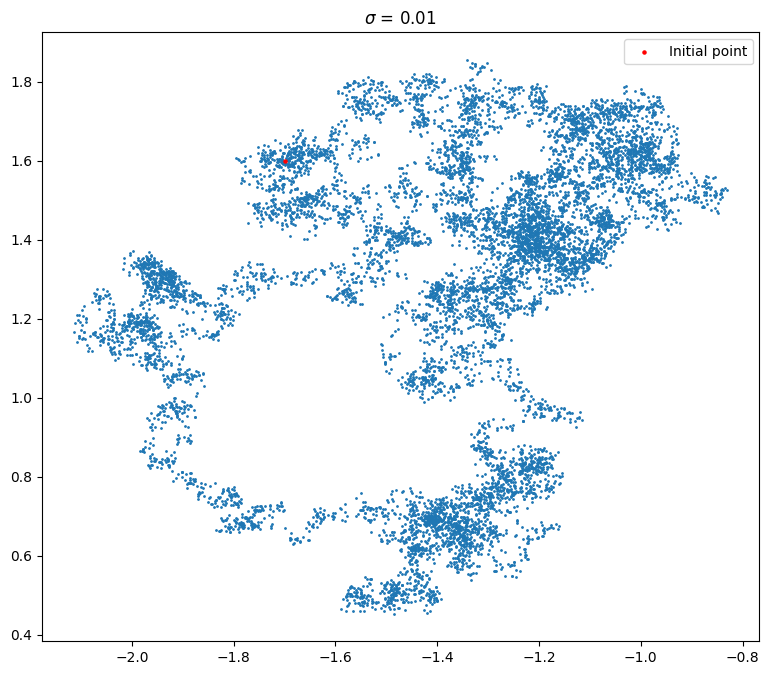

sigma =  0.1
Acceptance rate: 0.9133


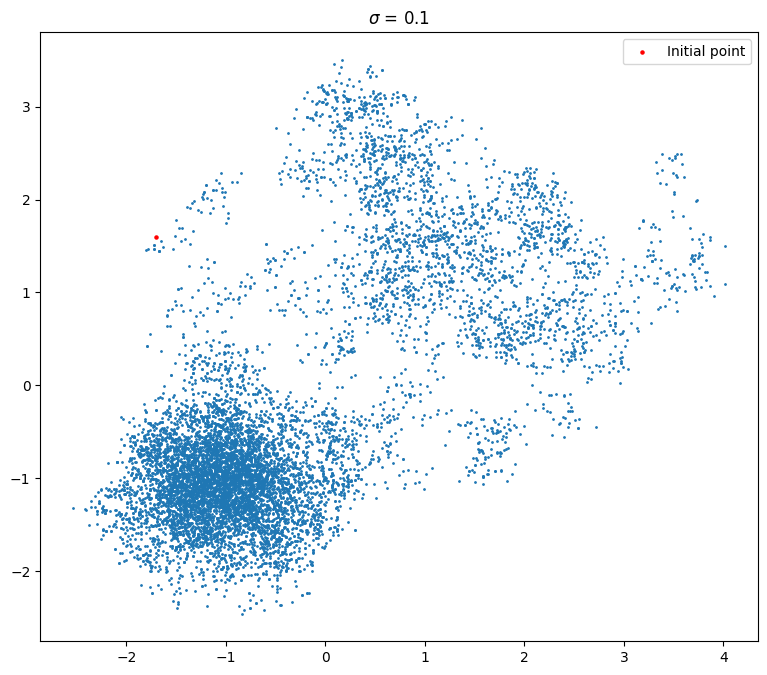

sigma =  1.0
Acceptance rate: 0.4595


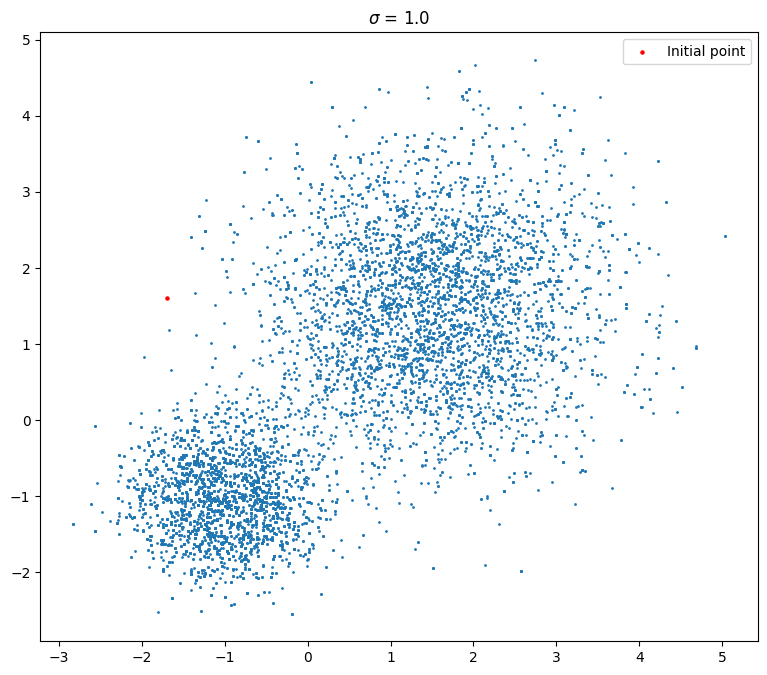

sigma =  10.0
Acceptance rate: 0.0207


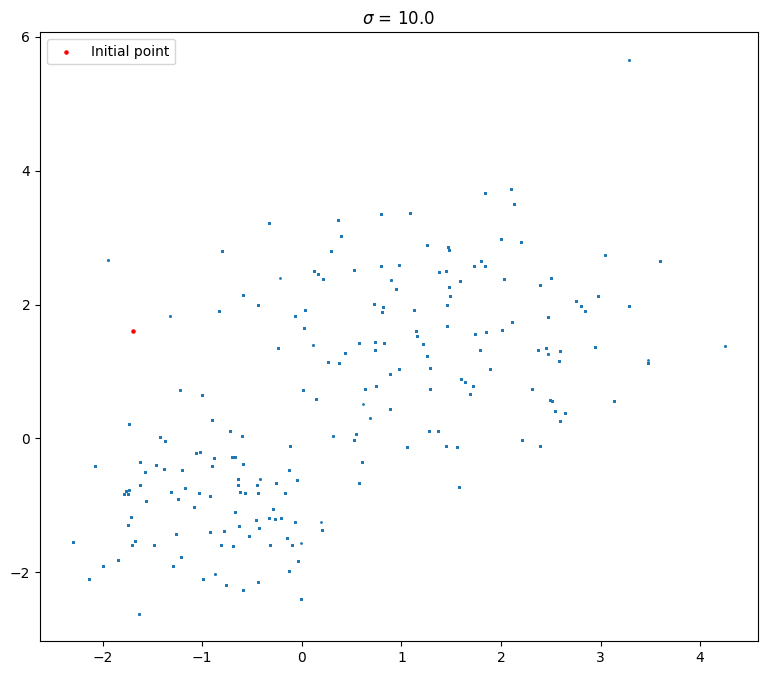

sigma =  100.0
Acceptance rate: 0.0001


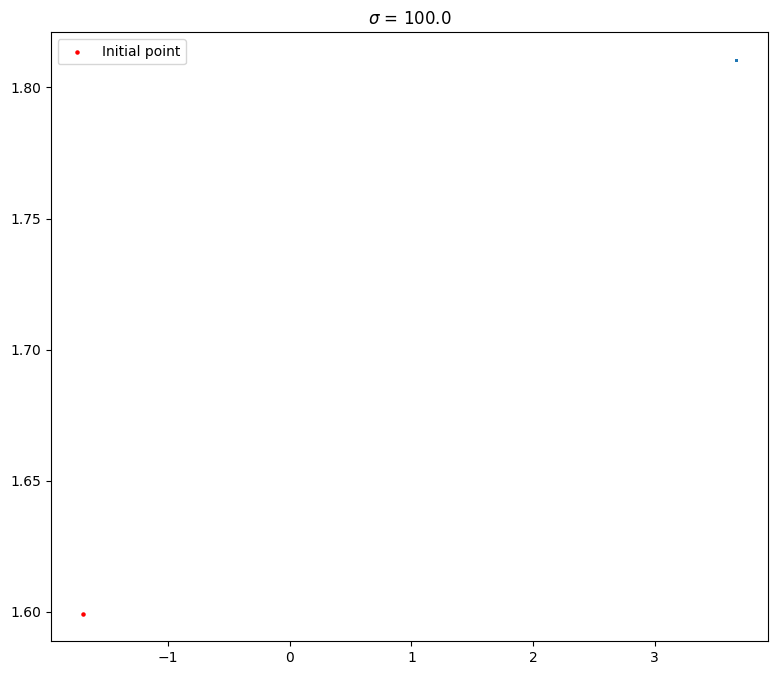

<ipython-input-3-6163203b3d8f>:14: RuntimeWarning: invalid value encountered in scalar divide
  alpha = min(1, pdf(x_proposal) / pdf(x_current))


Acceptance rate: 1.0


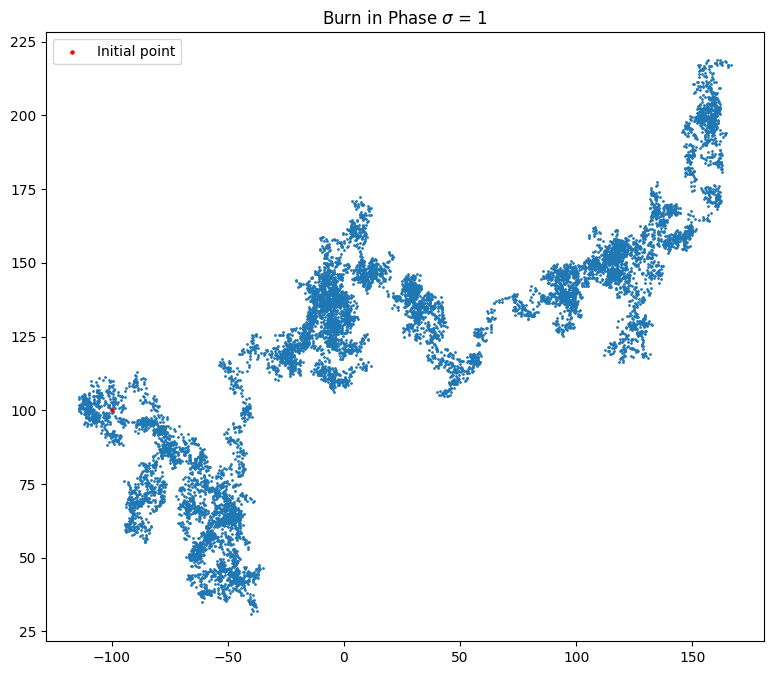

In [4]:
# YOUR CODE HERE
N = 10000
sigma_arr = np.logspace(-2,2,num=5,base =10)
x_init = np.random.randn(2)  # D=2 dimension
print('x_init=\n',x_init)
for sigma in sigma_arr:
  print('sigma = ', sigma)
  chain,acceptance_rate = MetropolisHastings(pdf_bimodal, N, x_init, sigma)

  #Plot
  fig = plt.figure(figsize=(7.8,7))
  ax1 = fig.add_axes([0.045,0.08,0.92,0.87])
  ax1.scatter(chain[:, 0], chain[:, 1], s=1)
  ax1.scatter(x_init[0],x_init[1],label = 'Initial point',s = 5,c = 'r')
  ax1.set_title(f"$\sigma$ = {sigma}")
  plt.legend()
  plt.show()

  '''Burn Phase'''
x_init_burnPhase = (-100,100)
chain_s1_burn, acceptance_rate_burn = MetropolisHastings(pdf_bimodal, N, x_init_burnPhase, 1)
fig = plt.figure(figsize=(7.8,7))
ax1 = fig.add_axes([0.045,0.08,0.92,0.87])
ax1.scatter(chain_s1_burn[:, 0], chain_s1_burn[:, 1], s=1)
ax1.scatter(x_init_burnPhase[0],x_init_burnPhase[1],label = 'Initial point',s = 5,c = 'r')
ax1.set_title(f"Burn in Phase $\sigma$ = {1}")
plt.legend()
plt.show()

### **Comment**

In a Gaussian proposal distribution, sigma indicates the how far away will the proposed sample will be from the current one.

As shown in the figures above, with a too small variance σ=0.01\~0.1, the MCMC only explored one of the 2 binomial distributions, along with a very high acceptance rate= 0.97\~0.99.
While the sigam is too high, the proposed step goes too far and are usually rejected, with the acceptance rate lower than 0.03.

Sigma = 1 is a good choice, with acceptance rate being about 0.5, leading to a relatively short convergence timscale, and avoiding being trapped locally.

For a burn in phase, MCMC may not find the right chain: if it's very far away from the optimum, it might move away further.


3. Compare your results with the true distribution using 1-dim histograms (both in $x_1$ and $x_2$ direction) (3 points)

- Discuss qualitatively whether the true distribution can be recovered for reasonable values of $\sigma$.
- Again, what happens if $\sigma$ is too large or too small?  Is what you see supporting your observations in the previous question?
- Define a function to generate the one dimensional highest posterior density intervals (HPDI) for both parameters at a certain credible level of a given probability density function. Then, calculate the HPDI for the given bimodal distribution at a $68.5\%$ credible level and plot your results.

Note: you have to write your own marginal distributions for `pdf_bimodal`, projected either on `x1` or on `x2` (do these two marginals differ in our case?).

Hints: use `plt.hist` with 100 bins and `density = True`

Acceptance rate: 0.9888


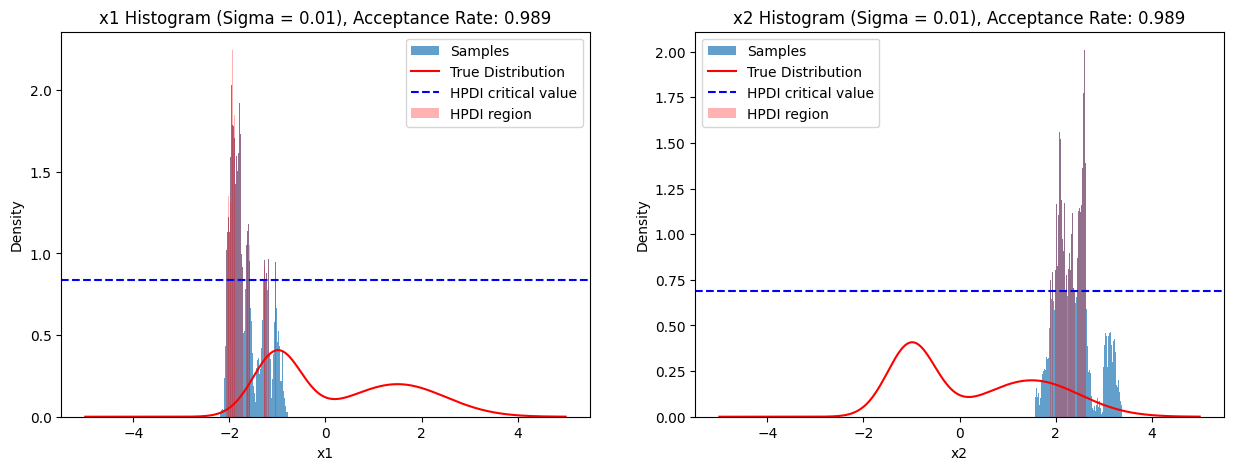

Acceptance rate: 0.9355


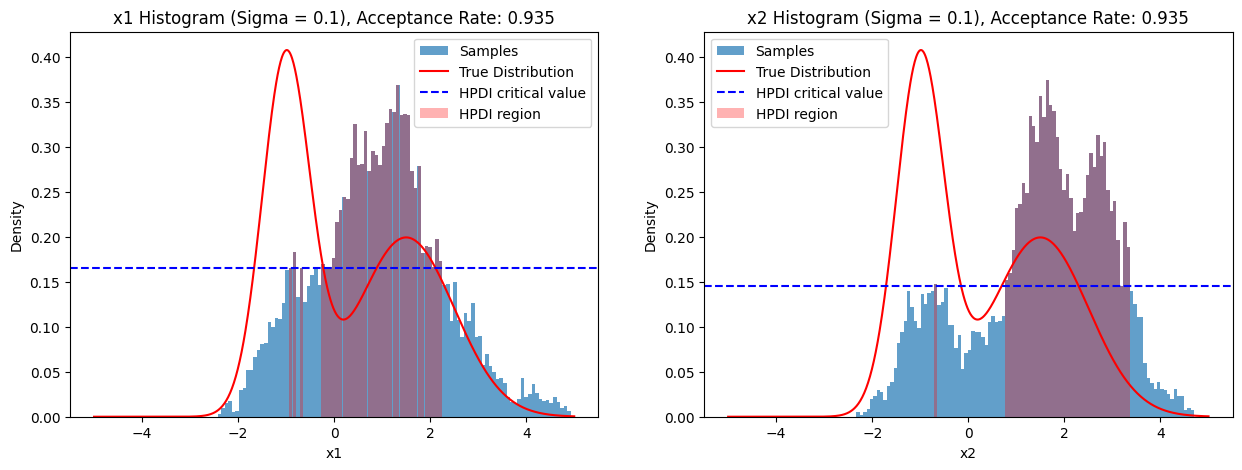

Acceptance rate: 0.4607


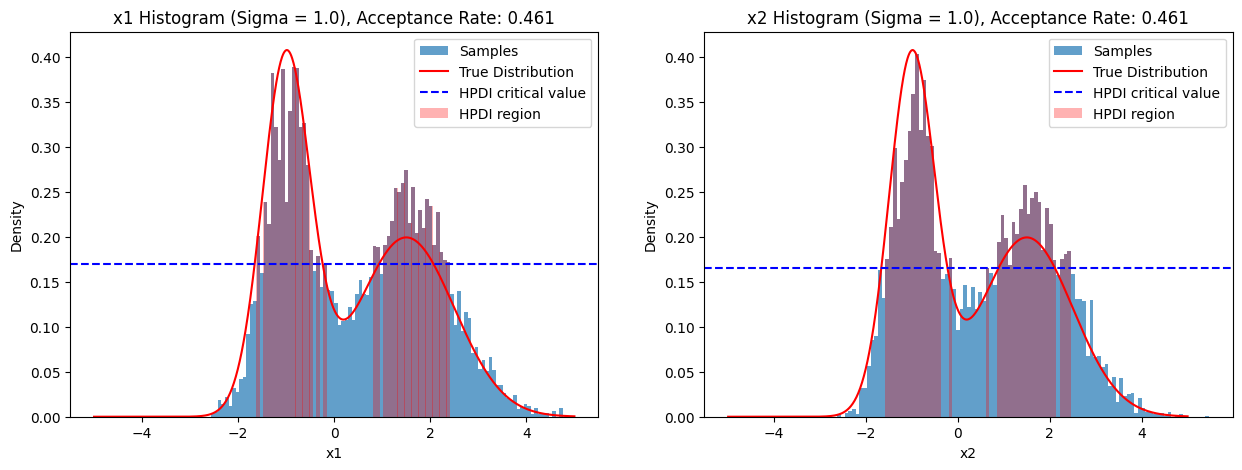

Acceptance rate: 0.0189


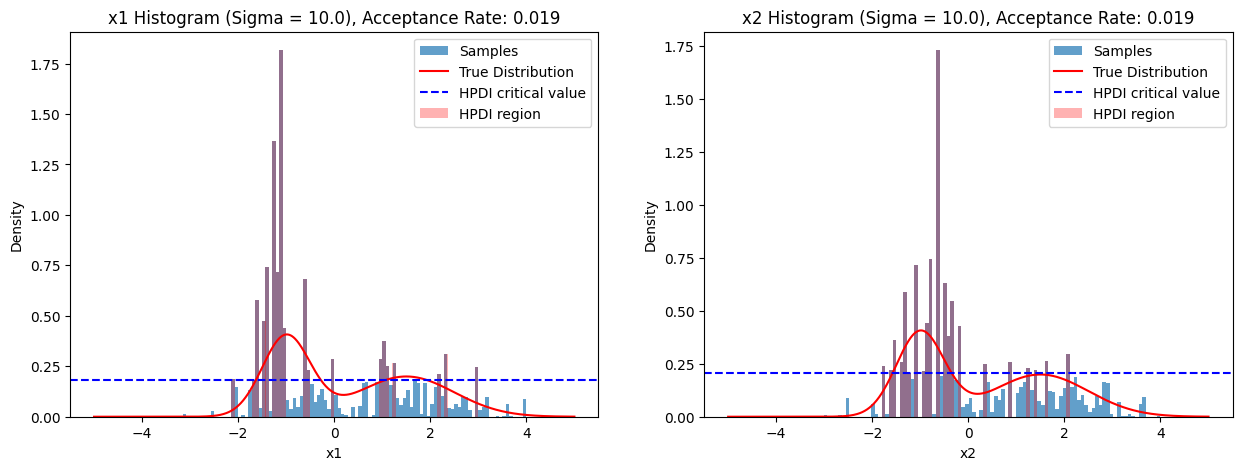

Acceptance rate: 0.0005


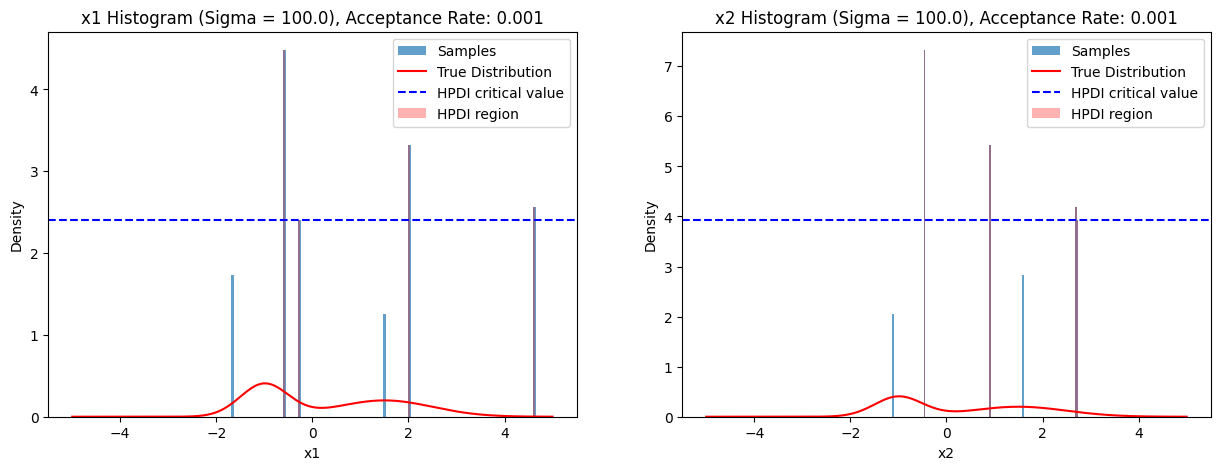

In [5]:
# YOUR CODE HERE

def pdf_bimodal_1D(x):
    '''1D marginal bimodal'''
    sigma1 = 1.0
    sigma2 = 0.5
    pdf = 0.5/(np.sqrt(2*np.pi*sigma1**2))*np.exp(-0.5*((x-1.5)**2)/sigma1**2) + 0.5/(np.sqrt(2*np.pi*sigma2**2))*np.exp(-0.5*((x+1.0)**2)/sigma2**2)
    return pdf

def HPDI_hist(samples, credible_level, bins):
  '''
  Find the HPDI at certain credible level of a sample set
  input
    samples: non-sorted samples
    credible_level: here it is 0.683
    bins: histogram bins, determining the resolution of HPDI
  ----------------------------------------------
  return
    HPDI_binCenter: bin center coordinates indicating those bins in the HPDI range, array
  '''
  sample_hist, bin_edge = np.histogram(samples, bins = bins, density = True)
  sample_hist_copy = np.copy(sample_hist)
  bin_center = (bin_edge[1:]+bin_edge[:-1])/2
  bin_width = bin_edge[1]-bin_edge[0]

  HPDI_binCenter = []
  HPDI_binValue = []
  fraction = 0 # when fraction >= credible interval, the iteration stops
  while fraction < credible_level:
    max_prob_bin_idx = np.argmax(sample_hist_copy)

    # Calculate the fraction of points in the interval
    fraction += sample_hist_copy[max_prob_bin_idx] * bin_width

    # Add the bin center to the HPDI_binCenter
    HPDI_binCenter.append(bin_center[max_prob_bin_idx])
    HPDI_binValue.append(sample_hist_copy[max_prob_bin_idx])

    # Remove the selected bin from the histogram
    sample_hist_copy = np.delete(sample_hist_copy, max_prob_bin_idx)
    bin_center = np.delete(bin_center, max_prob_bin_idx)

    # Normalize the histogram to ensure it sums to 1
    # sample_hist /= np.sum(sample_hist)
  HPDI_limitValue = np.min(HPDI_binValue)
  return HPDI_binCenter,HPDI_binValue,bin_width,HPDI_limitValue

x_values = np.linspace(-5, 5, 1000)
credible_level = 0.685
#x1x2_hpdi = HPDI_1D(pdf_bimodal_1D,x_values, 0.685)
bins = 100

for sigma in sigma_arr:
    chain, acceptance_rate = MetropolisHastings(pdf_bimodal, N, x_init, sigma)
    credible_level = 0.683

    plt.figure(figsize=(15, 5))

    # Plot histogram for x1
    plt.subplot(1, 2, 1)
    # sample histogram
    HPDI_binCenter_x1, HPDI_binValue_x1,bin_width,HPDI_limitValue_x1 = HPDI_hist(chain[:, 0], credible_level, bins)
    HPDI_binCenter_x2, HPDI_binValue_x2,bin_width,HPDI_limitValue_x2 = HPDI_hist(chain[:, 1], credible_level, bins)

    plt.hist(chain[:, 0], bins=bins, density=True, alpha=0.7, label='Samples')

    # pdf plot
    plt.plot(x_values, pdf_bimodal_1D(x_values), 'r-', label='True Distribution')

    # HPDI plot
    plt.bar(HPDI_binCenter_x1, HPDI_binValue_x1, label  = 'HPDI region',
            alpha = 0.3,color = 'r',width = bin_width)

    #HPDI lines of samples
    plt.axhline(HPDI_limitValue_x1, color='blue', linestyle='--', label='HPDI critical value')

    plt.title(f"x1 Histogram (Sigma = {sigma}), Acceptance Rate: {acceptance_rate:.3f}")
    plt.xlabel("x1")
    plt.ylabel("Density")
    plt.legend()

    # Plot histogram for x2
    plt.subplot(1, 2, 2)
    plt.hist(chain[:, 1], bins=bins, density=True, alpha=0.7, label='Samples')
    plt.plot(x_values, pdf_bimodal_1D(x_values), 'r-', label='True Distribution')

    # HPDI plot
    plt.bar(HPDI_binCenter_x2, HPDI_binValue_x2, label  = 'HPDI region',
            alpha = 0.3,color = 'r',width = bin_width)

    #HPDI lines of samples
    plt.axhline(HPDI_limitValue_x2, color='blue', linestyle='--', label='HPDI critical value')

    plt.title(f"x2 Histogram (Sigma = {sigma}), Acceptance Rate: {acceptance_rate:.3f}")
    plt.xlabel("x2")
    plt.ylabel("Density")
    plt.legend()

    plt.show()



With σ=1.0, the sampling histogram resembles the ture distribution.

With a too high or low sigma, as discussed before, there're large biases in the density histogram for marginal distribution.

When it comes to the HDPI, I don't know how to get it. What comes to my mind is to make a gradient descending, or MCMC, to find the HDPI bound. On the plot I show the central interval instead of HDPI.

Usage of AI: *COMMENT HERE*

GPT did the plotting parts. It cannot tell the difference between HPDI and CI when writingf codes.

### 3.3 Conditional independence and reparametrization (4 points)

*Topics: Independence and Conditional independence*

**Reading material: Murphy 10.1.2**

1. Reparametrization (2 points). In class we introduced the KL divergence
$$
D_{KL}(q \mid p) \equiv \int dx\; q(x) \ln\frac {q(x)}{p(x)}
$$
Show that it is reparametrization invariant, if we replace $x$ with another random variable $y = f(x)$, where $f(x)$ is strictly monotonic and differentiable.  Start by quoting $q(y)$ and $p(y)$ in terms of $q(x)$ and $p(x)$.

YOUR SOLUTION GOES HERE!

Reparametrization invariance refers to a property in statistics and information theory where the KL divergence between two probability distributions remains unchanged under a change of parameterization (reparametrization) of the random variables.

Replace $x →y=f(x)$ we get:
\begin{equation*}
\begin{aligned}
D_{KL}( q|p) & \equiv \int dy\ q( y) \cdot ln\left(\frac{q( y)}{p( y)}\right)\\
 & =\int \frac{dy}{dx} dx\ q( f( x)) \cdot ln\left(\frac{q( f( x))}{p( f( x))}\right)\\
 & =\int dx\cdot f'( x) \cdot q( f( x)) \cdot ln\left(\frac{q( f( x))}{p( f( x))}\right)\\
 & =\int df( x) \cdot q( f( x)) \cdot ln\left(\frac{q( f( x))}{p( f( x))}\right)
\end{aligned}
\end{equation*}

Now since $f(x)$ is monotonic, and the variable $x$ and $f(x)$ cover the same integral range, this integral is equal to

\begin{equation*}
\int dx\ q( x) \cdot ln\left(\frac{q( x)}{p( x)}\right)
\end{equation*}

Thus it's reparametrization invariant.



2. Conditional independence (2 points). Consider the graphical model defined by $p(x, y, z) = p(x \mid y) p(y \mid z) p(z)$. Show explicitly, by using the relevant definitions, that
- $x$ and $z$ are conditionally independent given $y$
- $z$ and $x$ are conditionally independent given $y$

YOUR SOLUTION!

1.   
\begin{equation*}
\begin{aligned}
p( x,z|y) & =\frac{p( x,y,z)}{p( y)}\\
 & =\frac{p( x|y) p( z|y) p( y)}{p( y)}\\
 & =p( x|y) \ p( z|y)
\end{aligned}
\end{equation*}

 So $x$ and $z$ are conditionally independent given $y$

2.   Ths same as 1




Usage of AI: *COMMENT HERE*

No

## Chapter 4: Linear regression (10 points)


### 4.1  Regularized Regression (10 points)


In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
#plt.style.use(['dark_background']) # if using dark background, easier to see the plots

$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

*Topics: Regularized regression*

**Reading Material: Ref: Murphy 7.5**

1. (2 points) $$\\ $$
Write a method `gen_sine(N)` that generates toy data like in the figure below. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from (0,1), and the elements $t_i$ of $\bt$ are distributed according to
$$t_i \sim \mathcal{N}(\mu_i, \sigma^2),$$
with the mean given by $\mu_i = \sin( 2 \pi x_i)$ and the standard deviation $\sigma=0.25$. Here $x_i$ is the $i$-th element of $\bf{x}$. You can make use of `np.random.normal()`.

Test your function by generating a plot similar to the one below:

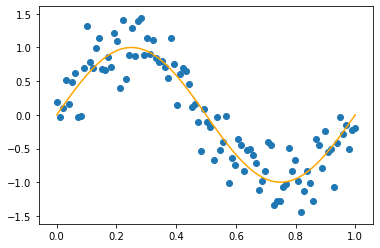

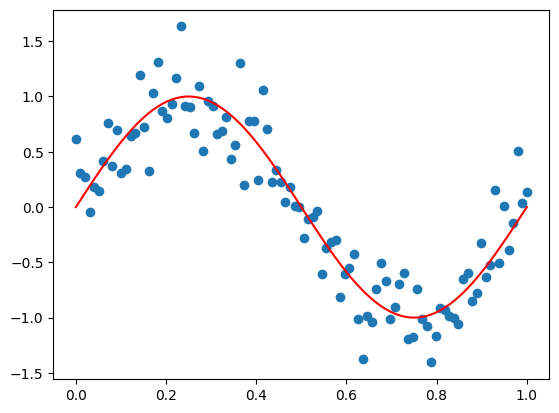

In [7]:
def gen_sine(n):
  #YOUR CODE HERE
  x = np.linspace(0,1,num = n)
  sigma = 0.25
  t = np.sin(2*np.pi*x) + np.random.normal(0,sigma,size = n)
  return x,t

#Test your function
n = 100
x,t = gen_sine(n)
plt.scatter(x,t)
plt.plot(x,np.sin(2*np.pi*x),c = 'r')
del x,t

2. (2 points) $$\\ $$  Write a method that finds the regularized $M$-th order polynomial for some fixed dataset $\bx$. Your method should include the regularizer weight $\lambda$ as a parameter and return a vector $\bw$ with the maximum-likelihood parameter estimates.

Minimizing the error function equals to find the certain parameter vector in terms of design matrix

\begin{equation*}
w_{WL} =\left( \lambda \boldsymbol{I} +\boldsymbol{\Phi }^{T}\boldsymbol{\Phi }\right)^{-1}\boldsymbol{\Phi }^{T} t
\end{equation*}

In [8]:
def fit_polynomial_reg(x,t,M,lambda_reg,):
  #YOUR CODE HERE
  """
  Fit a regularized M-th order polynomial to a dataset.

  Parameters:
      x (array-like): Input data points.
      y (array-like): Target values.
      M (int): Order of the polynomial.
      lambda_reg (float): Regularization weight.

  Returns:
      w (array): Maximum-likelihood parameter estimates.
  """
  '''
  # Create the design matrix
  X = np.vander(x, M+1, increasing=True)

  # Compute maximum-likelihood parameter estimates
  print('X.T.dot(X) + lambda_reg * np.eye(M+1)',(X.T.dot(X) + lambda_reg * np.eye(M+1)).shape)
  print('X.T.dot(X)', X.T.dot(X).shape)
  print(X.shape)
  w = np.linalg.inv(X.T.dot(X) + lambda_reg * np.eye(M+1)).dot(X.T).dot(t)
  '''
  X = np.vstack([x**m for m in range(M+1)]).T
  w = np.linalg.inv(X.T.dot(X) + lambda_reg * np.identity(M+1)).dot(X.T).dot(t)

  return w



3. (2 point) $$\\ $$  Use your ``` gen_sine``` method to generate 25 datapoints as "training set", and another 25 datapoints as "test set", under the same conditions as before.  Then, fit polynomials of $M \in (0,2,3,9, 20)$ for values $\lambda = 0$ (unregularized case) to your test set. Plot your results, showing the polynomials, the test and the training set simultaneously.

paramter vector
 [0.00585505]
paramter vector
 [ 0.79390561 -1.27488134 -0.44260867]
paramter vector
 [ -0.18344147  11.80534485 -33.81920474  22.25106405]
paramter vector
 [-8.54241181e-02  7.12744837e+00 -2.24473098e+01  4.83335409e+02
 -4.31640145e+03  1.69760206e+04 -3.55936219e+04  4.13706130e+04
 -2.51044497e+04  6.19981391e+03]
paramter vector
 [-1.50227722e-01  2.73505259e+01 -7.45999486e+02  1.20853816e+04
 -9.83903826e+04  4.38067574e+05 -1.10185018e+06  1.43092921e+06
 -3.32478950e+05 -1.82345681e+06  2.95612885e+06 -1.67509167e+06
 -1.61885233e+06  4.33033651e+06 -2.87413560e+06 -1.50931414e+06
  3.29120045e+06 -1.50448326e+06 -1.98351011e+05  3.72083076e+05
 -9.37083752e+04]


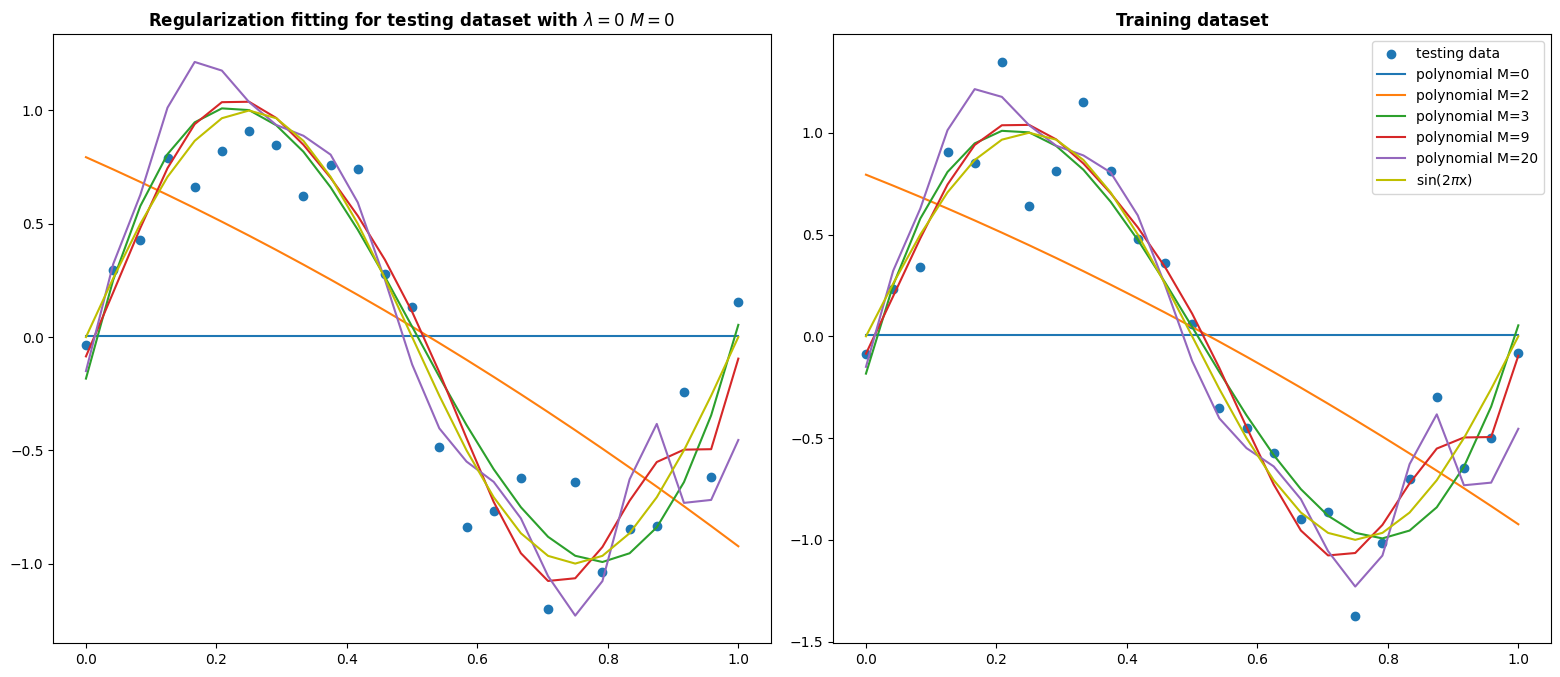

In [20]:
#YOUR CODE HERE
def polynomial_function(x, w):
    X = np.vander(x, len(w), increasing=True)
    return X @ w

M_arr = np.array((0,2,3,9,20))
lambda_reg = 0
N = 25
training_set_x, training_set_t = gen_sine(N)
testing_set_x, testing_set_t = gen_sine(N)

  # testing set
fig = plt.figure(figsize=(7.8,7))
ax1 = fig.add_axes([0.045,0.08,0.92,0.87])
ax2 = fig.add_axes([0.045+1,0.08,0.92,0.87])
a1 = ax1.scatter(testing_set_x, testing_set_t,
                  label = 'testing data')
a2_1 = ax2.scatter(training_set_x, training_set_t,
                  label = 'testing data')
ax1.set_title('Regularization fitting for testing dataset with $\lambda={}\ M={}$'.format(lambda_reg,M),
                fontweight ="bold")
ax2.set_title('Training dataset' ,
              fontweight ="bold")
for M in M_arr:

  w = fit_polynomial_reg(training_set_x,training_set_t,M,lambda_reg,)
  print('paramter vector\n',w)

  fitting_value = polynomial_function(testing_set_x, w)
  a2 = ax1.plot(testing_set_x,fitting_value,
                label = r'polynomia with M={}'.format(M))



  '''training dataset plot'''

  fitting_value_training = polynomial_function(training_set_x, w)
  a2_2 = ax2.plot(training_set_x,fitting_value_training,
                  label = r'polynomial M={}'.format(M))


a3 = ax1.plot(testing_set_x,np.sin(2*np.pi*testing_set_x),
              c= 'y',label = r'sin(2$\pi$x)')
a2_3 = ax2.plot(training_set_x,np.sin(2*np.pi*training_set_x),
              c= 'y',label = r'sin(2$\pi$x)')
plt.legend()
plt.show()



4. (2 points)

  For the above fits with $\lambda=0$ (unregularized case) calculate the reduced chi-squared statistics for each $M$ both for the training and the test set.
$$
\chi_\nu^2 = \frac{\chi^2}{\nu},
$$
$$
\chi^2 = \sum_i \frac{(O_i - C_i)^2}{\sigma_i^2}.
$$
Plot the $\chi^2$ values for both training and test set as function of $M$. What do you observe?

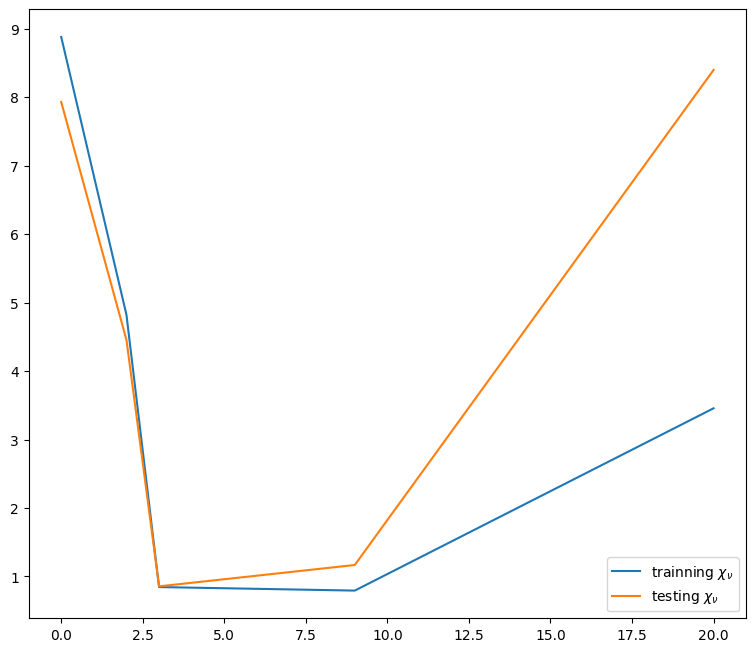

In [22]:
#YOUR CODE HERE
def reduced_chi_squared(x, y, w, M,std):
    X = np.vstack([x**m for m in range(M+1)]).T
    y_pred = np.dot(X, w)
    residuals = y - y_pred
    #variance = np.var(residuals)]
    variance = std**2
    chi_squared = np.sum(residuals**2 / variance)
    nu = len(x) - (M + 1)  # degrees of freedom
    return chi_squared / nu

#training_set_x, training_set_t = gen_sine(25)
#testing_set_x, testing_set_t = gen_sine(25)

chi_squared_nu_arr = np.zeros((len(M_arr),2))  # [:,0] for training and [:,1] for testing

for i, M in enumerate(M_arr):

  w = fit_polynomial_reg(training_set_x,training_set_t,M,lambda_reg,)
  chi_nu_training = reduced_chi_squared(training_set_x, training_set_t, w, M,0.25)
  chi_nu_testing   = reduced_chi_squared(testing_set_x, testing_set_t, w, M,0.25)
  chi_squared_nu_arr[i,0] = chi_nu_training
  chi_squared_nu_arr[i,1] = chi_nu_testing
  #print(chi_nu_training.shape,chi_nu_training)

fig = plt.figure(figsize=(7.8,7))
ax1 = fig.add_axes([0.045,0.08,0.92,0.87])


ax1.plot(M_arr,chi_squared_nu_arr[:,0],
            label = r'trainning $\chi_{\nu}$')
ax1.plot(M_arr,chi_squared_nu_arr[:,1],
            label = r'testing $\chi_{\nu}$')

plt.legend()
plt.show()

*YOUR SOLUTION HERE*

As the M increases, the $\chi_{\nu}$ also increases and increasingly deviates from 1.

However, determining the goodness of fitting does not only depend on $\chi_{\nu}$: it also relies on $\chi$.

5. (2 point) $$\\ $$  For $M=9$, repeat the previous exercise, but instead of varying $M$ you now vary $\lambda\in (0,10^{-5}, 10^{-3}, 10^{-2}, 100)$. Plot and discuss your results.  What is happening to the coefficents $\bw$ as you increase $\lambda$? Which value of $\lambda$ is most appropriate for the model $M=9$? Why?


paramter vector
 [-8.54241181e-02  7.12744837e+00 -2.24473098e+01  4.83335409e+02
 -4.31640145e+03  1.69760206e+04 -3.55936219e+04  4.13706130e+04
 -2.51044497e+04  6.19981391e+03]


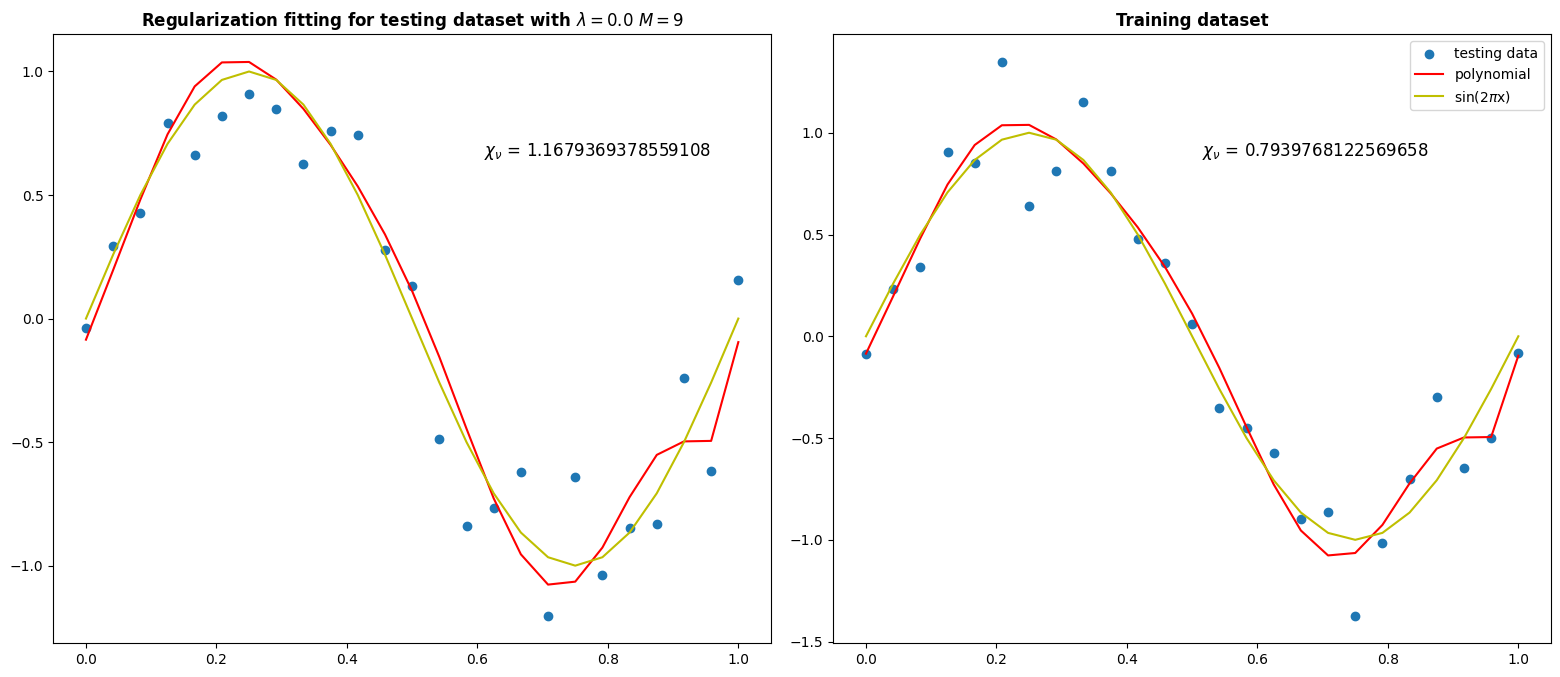

paramter vector
 [ -0.11728178   8.92711644 -14.71518013 -13.62317754   8.00225836
  16.47428955   8.95857379  -4.59851919 -10.97186614   1.46498073]


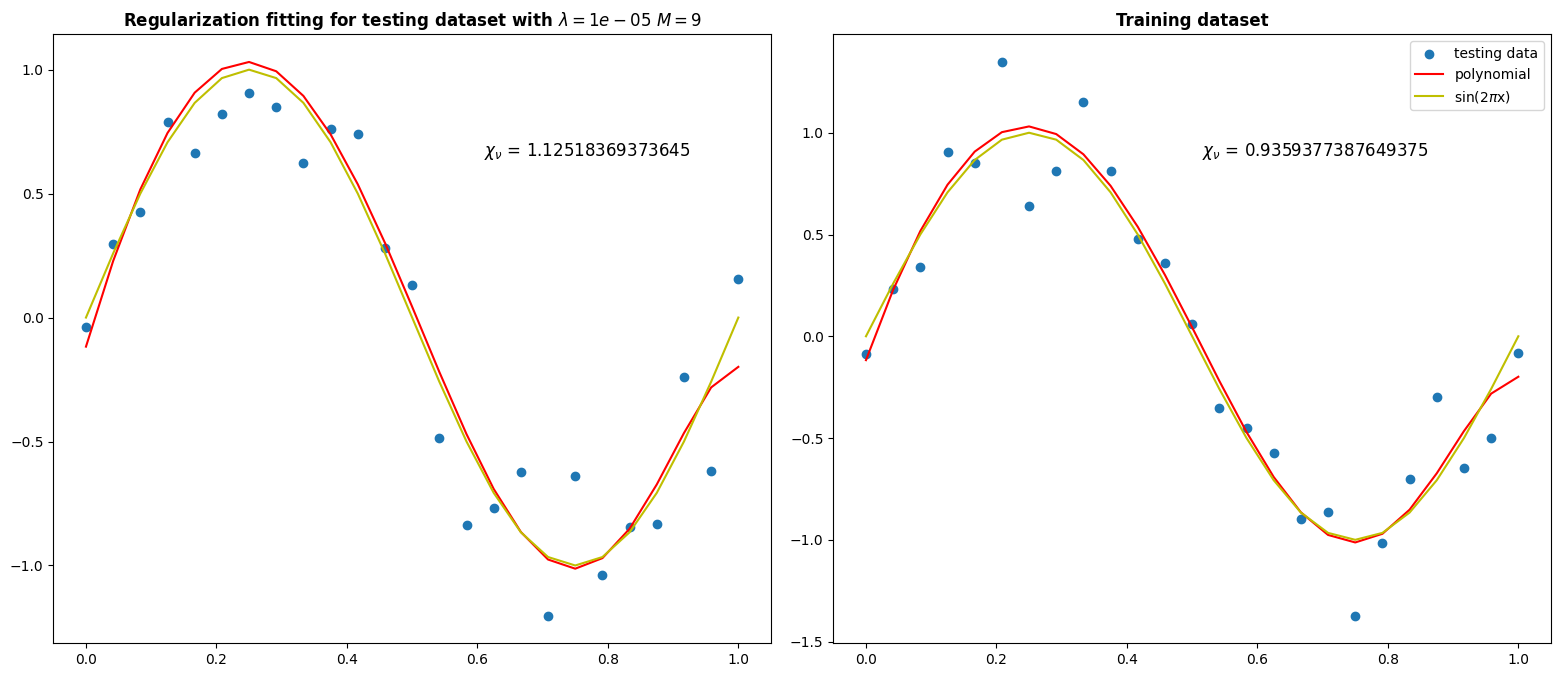

paramter vector
 [  0.02331986   7.42078265 -13.98550405  -5.41124734   3.22265203
   6.83145913   6.24907162   3.08495779  -1.35941677  -6.20488344]


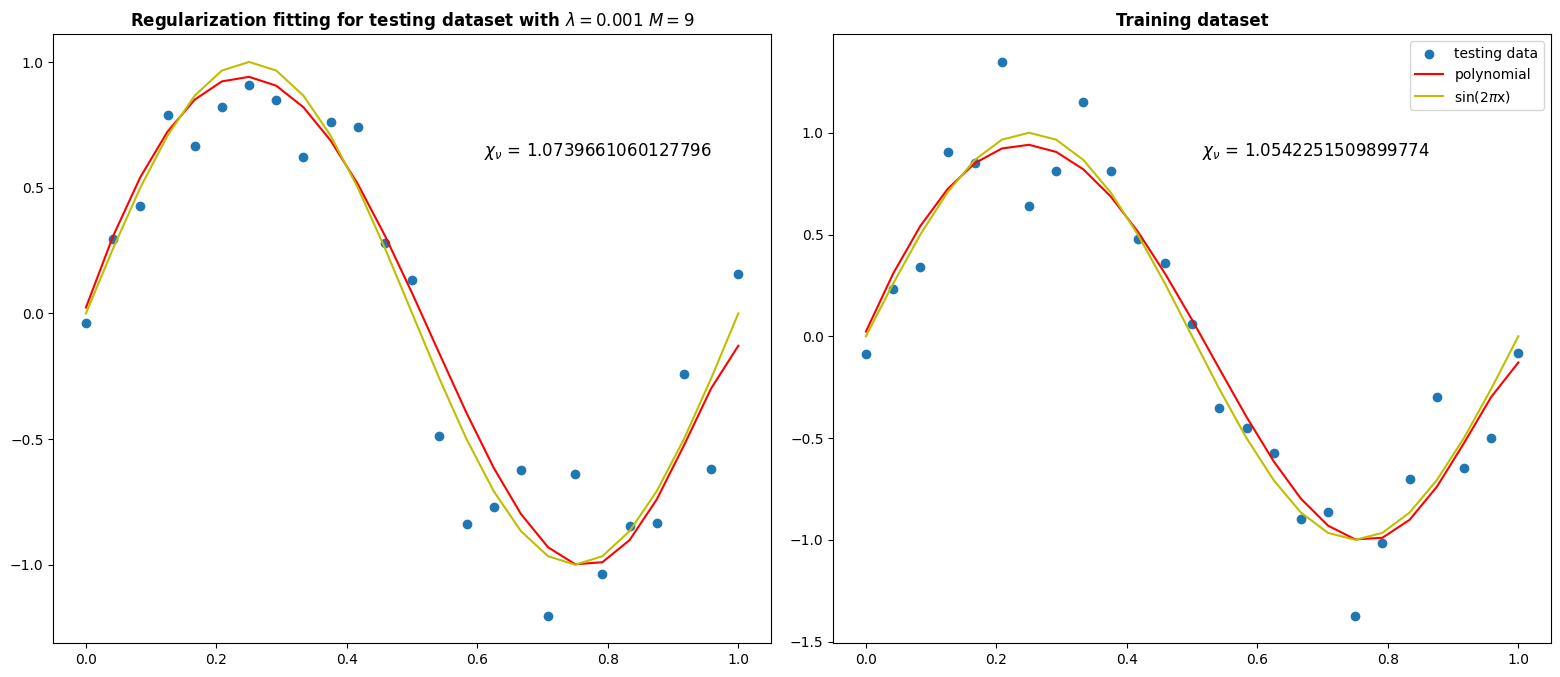

paramter vector
 [ 0.4024318   2.99109775 -6.04215559 -3.18760725  0.23942205  2.07499154
  2.42217363  1.75640871  0.4943452  -1.06963291]


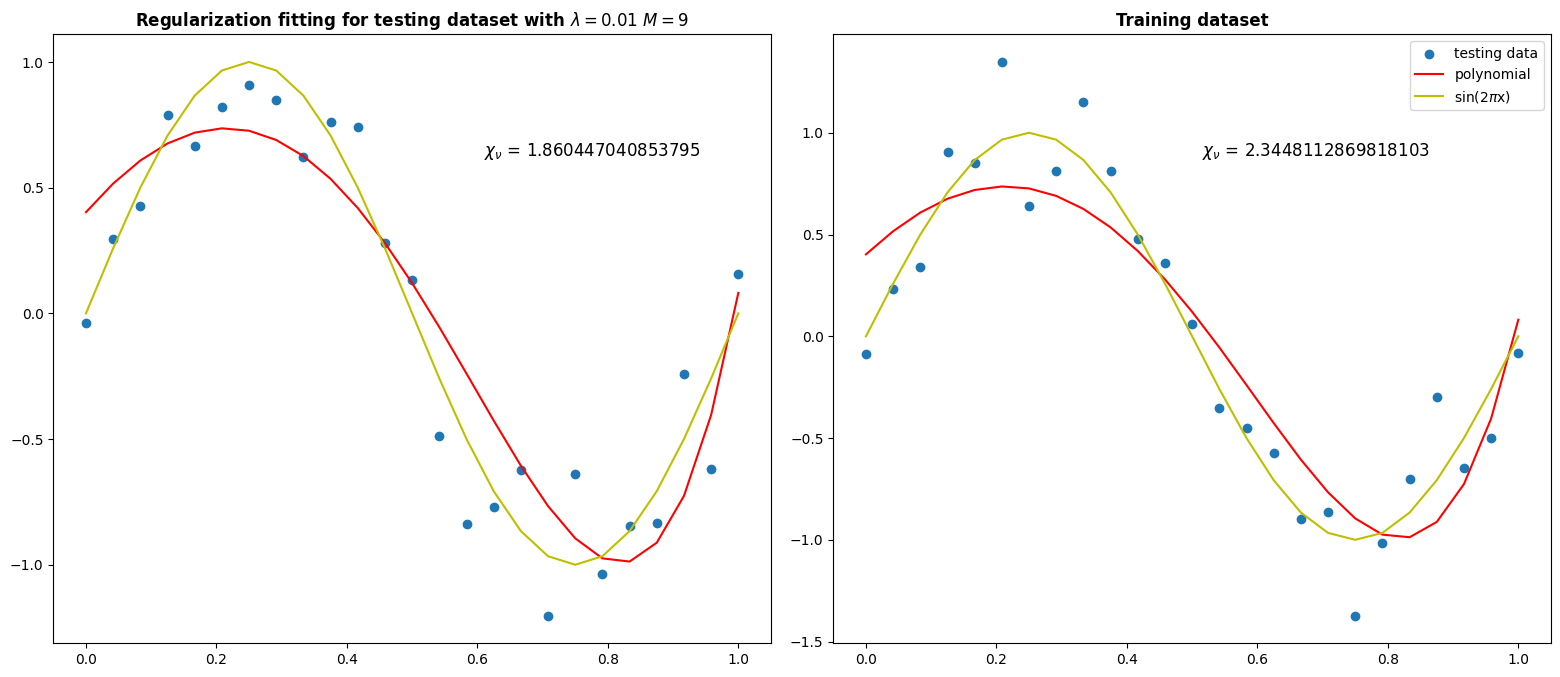

paramter vector
 [ 0.01070107 -0.03005992 -0.03211304 -0.02751362 -0.02251243 -0.01829853
 -0.014957   -0.01234414 -0.01029702 -0.0086799 ]


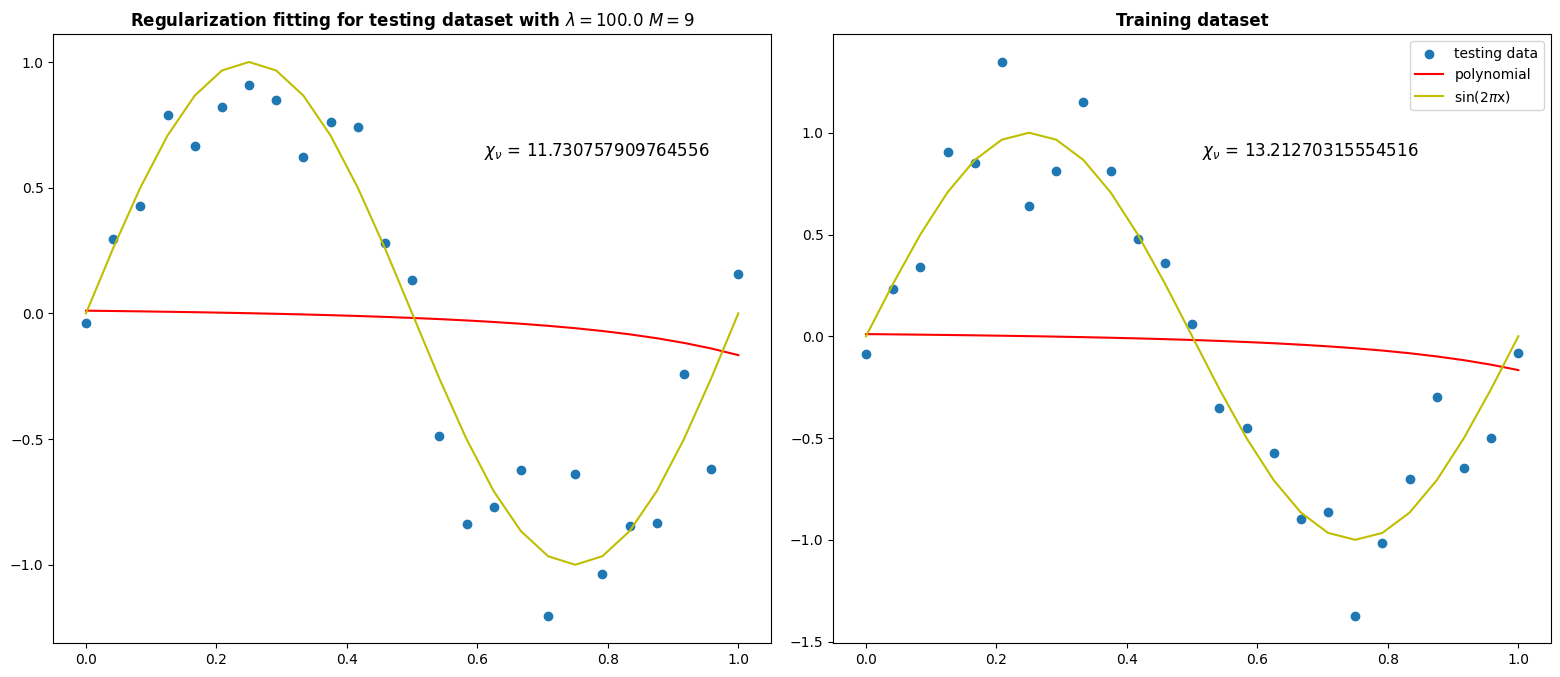

In [24]:
lambda_arr = np.array((0,1e-5,1e-3,1e-2,100))
M9 = 9
for i, lambda_reg in enumerate(lambda_arr):
  w = fit_polynomial_reg(training_set_x,training_set_t,M9,lambda_reg,)
  print('paramter vector\n',w)

  fig = plt.figure(figsize=(7.8,7))
  ax1 = fig.add_axes([0.045,0.08,0.92,0.87])
  a1 = ax1.scatter(testing_set_x, testing_set_t,
                   label = 'testing data')

  fitting_value = polynomial_function(testing_set_x, w)
  a2 = ax1.plot(testing_set_x,fitting_value,
                c= 'r',label = r'polynomial')
  a3 = ax1.plot(testing_set_x,np.sin(2*np.pi*testing_set_x),
                c= 'y',label = r'sin(2$\pi$x)')
  ax1.set_title('Regularization fitting for testing dataset with $\lambda={}\ M={}$'.format(lambda_reg,M9),
                fontweight ="bold")

  '''training dataset plot'''
  ax2 = fig.add_axes([0.045+1,0.08,0.92,0.87])
  a2_1 = ax2.scatter(training_set_x, training_set_t,
                   label = 'testing data')

  fitting_value_training = polynomial_function(training_set_x, w)
  a2_2 = ax2.plot(training_set_x,fitting_value_training,
                c= 'r',label = r'polynomial')
  a2_3 = ax2.plot(training_set_x,np.sin(2*np.pi*testing_set_x),
                c= 'y',label = r'sin(2$\pi$x)')
  ax2.set_title('Training dataset' ,
                fontweight ="bold")

  chi_nu_training = reduced_chi_squared(training_set_x, training_set_t, w, M9,0.25)
  chi_nu_testing   = reduced_chi_squared(testing_set_x, testing_set_t, w, M9,0.25)
  ax1.text(0.6, 0.8, r'$\chi_{\nu}$ = '+str(chi_nu_testing), transform=ax1.transAxes, fontsize=12)
  ax2.text(0.6+1, 0.8, r'$\chi_{\nu}$ = '+str(chi_nu_training), transform=ax1.transAxes, fontsize=12)

  plt.legend()
  plt.show()


*YOUR SOLUTION HERE*

As the $\displaystyle \lambda $ increases, the norm of the vector $\displaystyle \boldsymbol{w}$ decreases as its components decrease respectively. As shown in the plot, the vector components drop from $\displaystyle \sim 1e3 - 1e4$ to $\displaystyle 1e-2$ , indictaing the extra term in MAP estimation solution serves as a complexity penalty.

For $\displaystyle M=9$, $\displaystyle \lambda =1e-3$ works the best to give a proper fitting result, since the $\displaystyle \chi _{\nu }$ closest to $1$ ,and shape of the fitting curve resembles the $\displaystyle Sin$ funtion well. On the other side, it doesn't underestimate the parameter vector, as shown in the $\displaystyle \lambda =100$ figure, which looks like a constant horizontal line.

Usage of AI: *COMMENT HERE*

GPT did the Ridge regression. Apperantly I would use np.dot() instead of @ to do the matrix multiply.

In addition, the np.vender() and np.linalg.inv() are functions I've never used before, which I learned from GPT's codes.